<a href="https://colab.research.google.com/github/ownit4137/TIL/blob/main/DLCV/RCNN/210225_ObjDt_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow-gpu==1.15.2
!pip install keras==2.3.0

In [3]:
import tensorflow as tf
import keras

print(tf.__version__)
print(keras.__version__)

tf.test.gpu_device_name()

1.15.2
2.3.0


'/device:GPU:0'

In [4]:
!nvidia-smi

Thu Feb 25 13:35:58 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P0    26W /  70W |    104MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import time

image shape: (633, 806, 3)


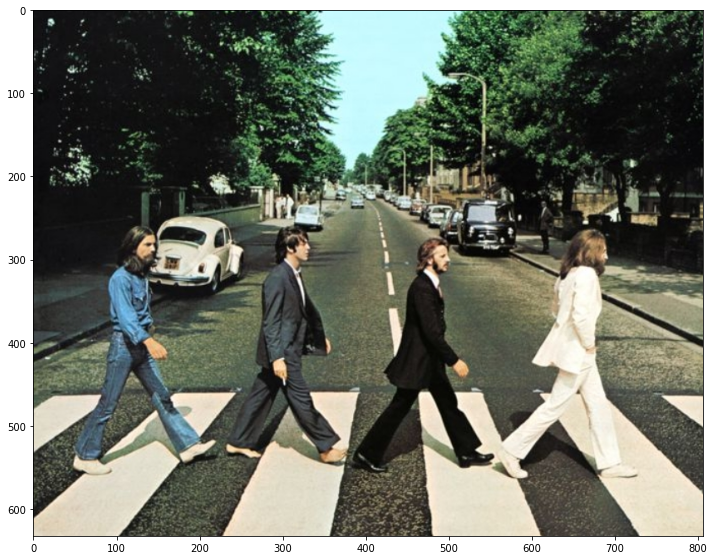

In [6]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/DLCV_inflearn/DLCV/data/image/beatles01.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print('image shape:', img.shape)
plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)

In [7]:
labels_to_names = {1:'person',2:'bicycle',3:'car',4:'motorcycle',5:'airplane',6:'bus',7:'train',8:'truck',9:'boat',10:'traffic light',
                    11:'fire hydrant',12:'street sign',13:'stop sign',14:'parking meter',15:'bench',16:'bird',17:'cat',18:'dog',19:'horse',20:'sheep',
                    21:'cow',22:'elephant',23:'bear',24:'zebra',25:'giraffe',26:'hat',27:'backpack',28:'umbrella',29:'shoe',30:'eye glasses',
                    31:'handbag',32:'tie',33:'suitcase',34:'frisbee',35:'skis',36:'snowboard',37:'sports ball',38:'kite',39:'baseball bat',40:'baseball glove',
                    41:'skateboard',42:'surfboard',43:'tennis racket',44:'bottle',45:'plate',46:'wine glass',47:'cup',48:'fork',49:'knife',50:'spoon',
                    51:'bowl',52:'banana',53:'apple',54:'sandwich',55:'orange',56:'broccoli',57:'carrot',58:'hot dog',59:'pizza',60:'donut',
                    61:'cake',62:'chair',63:'couch',64:'potted plant',65:'bed',66:'mirror',67:'dining table',68:'window',69:'desk',70:'toilet',
                    71:'door',72:'tv',73:'laptop',74:'mouse',75:'remote',76:'keyboard',77:'cell phone',78:'microwave',79:'oven',80:'toaster',
                    81:'sink',82:'refrigerator',83:'blender',84:'book',85:'clock',86:'vase',87:'scissors',88:'teddy bear',89:'hair drier',90:'toothbrush',
                    91:'hair brush'}

In [18]:
def obj_detect_tf(sess, img_array):
    rows = img_array.shape[0]
    cols = img_array.shape[1]
    draw_img_array = img_array.copy()
    
    inp = img_array[:, :, [2, 1, 0]]  # BGR2RGB

    start = time.time()
    # detection start
    out = sess.run([sess.graph.get_tensor_by_name('num_detections:0'),
                    sess.graph.get_tensor_by_name('detection_scores:0'),
                    sess.graph.get_tensor_by_name('detection_boxes:0'),
                    sess.graph.get_tensor_by_name('detection_classes:0')],
                   feed_dict={'image_tensor:0': inp.reshape(1, inp.shape[0], inp.shape[1], 3)})
    
    green_color=(0, 255, 0)
    red_color=(0, 0, 255)
    
    # bbox
    num_detections = int(out[0][0])
    for i in range(num_detections):
        classId = int(out[3][0][i])
        score = float(out[1][0][i])
        bbox = [float(v) for v in out[2][0][i]]
        if score > 0.5:
            top = bbox[0] * rows
            left = bbox[1] * cols
            bottom = bbox[2] * rows
            right = bbox[3] * cols

            cv2.rectangle(draw_img_array, (int(left), int(top)), (int(right), int(bottom)), green_color, thickness=2)
            caption = "{}: {:.4f}".format(labels_to_names[classId], score)
            cv2.putText(draw_img_array, caption, (int(left), int(top - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, red_color, 1)

    print('Detection 수행시간:',round(time.time() - start, 2),"초")
    return draw_img_array

In [21]:
with tf.gfile.FastGFile('/content/drive/MyDrive/Colab Notebooks/DLCV_inflearn/faster_rcnn_resnet50_coco_2018_01_28/frozen_inference_graph.pb', 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    
with tf.Session() as sess:
    sess.graph.as_default()
    tf.import_graph_def(graph_def, name='')
    
    bt_img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/DLCV_inflearn/DLCV/data/image/beatles01.jpg')
    bt_draw_img = obj_detect_tf(sess, bt_img)

    bs_img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/DLCV_inflearn/DLCV/data/image/baseball01.jpg')
    bs_draw_img = obj_detect_tf(sess, bs_img)

Detection 수행시간: 6.39 초
Detection 수행시간: 1.02 초


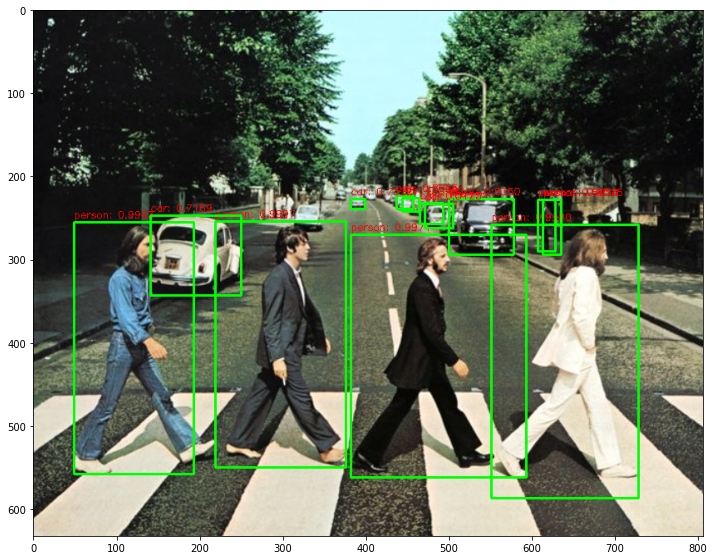

In [22]:
bt_draw_img = cv2.cvtColor(bt_draw_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 12))
plt.imshow(bt_draw_img)

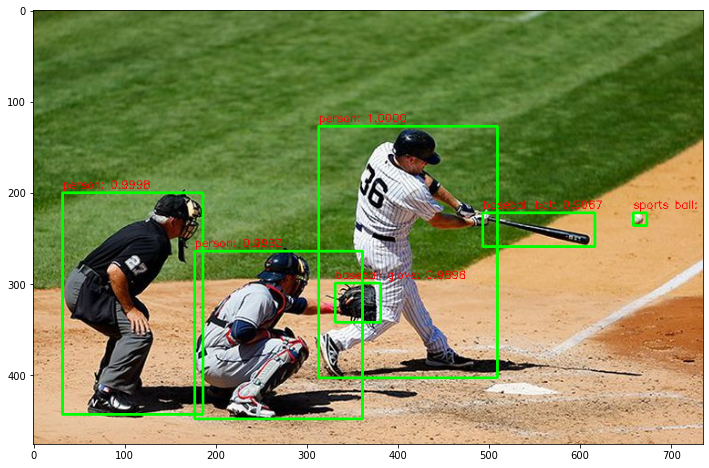

In [23]:
bs_draw_img = cv2.cvtColor(bs_draw_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 12))
plt.imshow(bs_draw_img)

In [26]:
video_input_path = '/content/drive/MyDrive/Colab Notebooks/DLCV_inflearn/DLCV/data/video/John_Wick_small.mp4'
video_output_path = '/content/drive/MyDrive/Colab Notebooks/DLCV_inflearn/DLCV/data/video/John_Wick_small_tf01.avi'

cap = cv2.VideoCapture(video_input_path)
codec = cv2.VideoWriter_fourcc(*'XVID')

vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
vid_fps = cap.get(cv2.CAP_PROP_FPS)
    
vid_writer = cv2.VideoWriter(video_output_path, codec, vid_fps, vid_size) 

frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print('총 Frame 갯수:', frame_cnt)

green_color=(0, 255, 0)
red_color=(0, 0, 255)

총 Frame 갯수: 58


In [28]:
with tf.Session() as sess:
    sess.graph.as_default()
    tf.import_graph_def(graph_def, name='')

    while True:
        hasFrame, img_frame = cap.read()
        if not hasFrame:
            print('더 이상 처리할 frame이 없습니다.')
            break

        draw_img_frame = obj_detect_tf(sess, img_frame)
        vid_writer.write(draw_img_frame)

vid_writer.release()
cap.release()

Detection 수행시간: 8.45 초
Detection 수행시간: 0.09 초
Detection 수행시간: 0.11 초
Detection 수행시간: 0.09 초
Detection 수행시간: 0.09 초
Detection 수행시간: 0.09 초
Detection 수행시간: 0.09 초
Detection 수행시간: 0.09 초
Detection 수행시간: 0.09 초
Detection 수행시간: 0.09 초
Detection 수행시간: 0.1 초
Detection 수행시간: 0.1 초
Detection 수행시간: 0.09 초
Detection 수행시간: 0.09 초
Detection 수행시간: 0.09 초
Detection 수행시간: 0.1 초
Detection 수행시간: 0.1 초
Detection 수행시간: 0.1 초
Detection 수행시간: 0.09 초
Detection 수행시간: 0.1 초
Detection 수행시간: 0.09 초
Detection 수행시간: 0.1 초
Detection 수행시간: 0.09 초
Detection 수행시간: 0.1 초
Detection 수행시간: 0.09 초
Detection 수행시간: 0.1 초
Detection 수행시간: 0.09 초
Detection 수행시간: 0.1 초
Detection 수행시간: 0.1 초
Detection 수행시간: 0.1 초
Detection 수행시간: 0.09 초
Detection 수행시간: 0.1 초
Detection 수행시간: 0.09 초
Detection 수행시간: 0.09 초
Detection 수행시간: 0.09 초
Detection 수행시간: 0.1 초
Detection 수행시간: 0.09 초
Detection 수행시간: 0.09 초
Detection 수행시간: 0.1 초
Detection 수행시간: 0.1 초
Detection 수행시간: 0.09 초
Detection 수행시간: 0.1 초
Detection 수행시간: 0.09 초
Detection 수행시간: 0.09 초
Detec